In [1]:
import pandas as pd
import numpy as np

## Prétraitement des données:

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Structure des données:**

In [3]:
print(data.shape)

(4424, 35)


**Seulement notre target est une entrée de type non-numérique:**

In [4]:
print(data.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import graphviz

In [6]:
data = data[data['Target'] != "Enrolled"]
print(data.shape)

dataY = data.iloc[:,-1:]
dataX = data.drop("Target", axis=1)

arrayX = pd.DataFrame.to_numpy(dataX)
arrayY = pd.DataFrame.to_numpy(dataY)

print(arrayX.shape)
print(arrayY.shape)

(3630, 35)
(3630, 34)
(3630, 1)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(arrayX, arrayY, test_size=0.2)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

c:\Users\Guillaume Gagnon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Guillaume Gagnon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Classification par xgboost:

In [8]:
xgbClassifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42, booster= "gblinear")
xgbClassifier.fit(X_train, y_train)
xgbClassifier.score(X_train, y_train)

0.9204545454545454

In [9]:
xgbClassifier.score(X_test, y_test)

0.9049586776859504

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

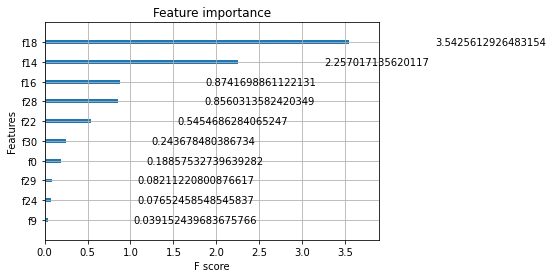

In [10]:
xgbClassifier.score(X_test, y_test)
xgb.plot_importance(xgbClassifier, max_num_features=10)

In [14]:
importances = xgbClassifier.feature_importances_
print(importances)
pd.Series(importances, index=dataX.columns).sort_values()

[ 0.04280994 -0.00880665 -0.01570957 -0.02300236 -0.07089586  0.00558187
 -0.051665   -0.00356279  0.00332425  0.0088883   0.00207738 -0.0585844
 -0.07700317 -0.30434442  0.5123829  -0.09040429  0.19845207 -0.00738469
  0.80422425 -0.03349421 -0.065085   -0.00729546  0.12383106 -0.0189165
  0.01737244 -0.05174855 -0.08609537 -0.01344506  0.19433431  0.01864093
  0.05531934 -0.0095215   0.00834419  0.00138161]


Debtor                                           -0.304344
Gender                                           -0.090404
Curricular units 2nd sem (enrolled)              -0.086095
Educational special needs                        -0.077003
Daytime/evening attendance                       -0.070896
Curricular units 1st sem (enrolled)              -0.065085
Displaced                                        -0.058584
Curricular units 2nd sem (credited)              -0.051749
Nacionality                                      -0.051665
Curricular units 1st sem (credited)              -0.033494
Course                                           -0.023002
Curricular units 1st sem (grade)                 -0.018916
Application order                                -0.015710
Curricular units 2nd sem (evaluations)           -0.013445
Unemployment rate                                -0.009522
Application mode                                 -0.008807
Age at enrollment                                -0.0073

## Classification par SVC (SVM pour classification):

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [16]:
svcClassifier = SVC(kernel="rbf", C=1.0, degree=3, gamma='scale')
svcClassifier.fit(X_train, y_train)
svcClassifier.score(X_train, y_train)

0.897038567493113

In [17]:
svcClassifier.score(X_test, y_test)

0.8691460055096418

In [18]:
predz = svcClassifier.predict(X_test)
print(classification_report(y_test, predz))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       278
           1       0.86      0.94      0.90       448

    accuracy                           0.87       726
   macro avg       0.88      0.85      0.86       726
weighted avg       0.87      0.87      0.87       726



In [20]:
""" parameters_to_tune = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.0001],
    'degree': [2, 3, 4]
}

grid_search = GridSearchCV(SVC(), parameters_to_tune, refit=True, verbose=3, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_) """

" parameters_to_tune = {\n    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],\n    'C': [0.1, 1, 10, 100],\n    'gamma': ['scale', 'auto', 0.001, 0.0001],\n    'degree': [2, 3, 4]\n}\n\ngrid_search = GridSearchCV(SVC(), parameters_to_tune, refit=True, verbose=3, cv=5, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\nprint(grid_search.best_params_) "

In [21]:
parameters_to_tune = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.001],
}

grid_search = GridSearchCV(SVC(), parameters_to_tune, refit=True, verbose=10, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [26]:
svcClassifier_optimized = SVC(kernel="linear", C=0.1, degree=3, gamma='scale')
svcClassifier_optimized.fit(X_train, y_train)
svcClassifier_optimized.score(X_train, y_train)

0.9190771349862259

In [27]:
svcClassifier_optimized.score(X_test, y_test)

0.9035812672176309

Le *svcClassifier_optimized* possède un noyeau linéaire donc il est possible de faire cette manipulation pour obtenir les features importants pour la classification:

In [28]:
coefs = svcClassifier_optimized.coef_
print(coefs)

[[ 1.13291288e-01 -1.19472094e-02 -2.81018082e-02 -4.59865049e-02
  -1.98963005e-01  7.91218858e-03  4.26012134e-02 -1.51015334e-02
   7.73485428e-03  1.22143252e-02  8.74775939e-03 -1.26393179e-01
   5.24794231e-02 -7.44452319e-01  1.25844867e+00 -1.99811996e-01
   5.27605728e-01 -1.91062800e-02  1.95584709e-01 -1.28139592e-01
  -2.65944461e-01  2.57386509e-02  4.19337457e-01 -9.69750179e-02
   2.92119843e-02 -6.10655872e-02 -3.84540903e-01 -3.67916282e-03
   5.63009575e-01  6.94833936e-02  9.70110189e-02 -3.85217379e-02
  -7.02944132e-03  3.79995913e-06]]


L'utilisation d'un noyeau linéaire permet au SVM de rester dans l'espace dimensionnel de base et ne projète pas les features dans un espace à plus haute dimensionnalité, comme le ferait un noyeau Gaussien ou RBF, par exemple. C'est pourquoi nous pouvons directement récupérer l'importance des features.

In [29]:
pd.Series(coefs[0], index=dataX.columns).sort_values()

Debtor                                           -0.744452
Curricular units 2nd sem (enrolled)              -0.384541
Curricular units 1st sem (enrolled)              -0.265944
Gender                                           -0.199812
Daytime/evening attendance                       -0.198963
Curricular units 1st sem (credited)              -0.128140
Displaced                                        -0.126393
Curricular units 1st sem (grade)                 -0.096975
Curricular units 2nd sem (credited)              -0.061066
Course                                           -0.045987
Unemployment rate                                -0.038522
Application order                                -0.028102
Age at enrollment                                -0.019106
Mother's qualification                           -0.015102
Application mode                                 -0.011947
Inflation rate                                   -0.007029
Curricular units 2nd sem (evaluations)           -0.0036